Aircraft Data:
 [369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369
 369 369 369 369 369 369 369 369 368 368 368 368 368 368 369 369 369 369
 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 369 368
 368 368 368 368 368 368 368 368 368 368 368 368 368 368 367 367 367 367
 367 367 367 367 367 367 367 367 367 366 366 366 366 366 366 366 365 365
 365 363 363 363 363 363 363 363 363 363 363 363 363 362 362 362 362 361
 361 361 361 361 361 361 361 361 361 361 361 360 360 360 360 360 360 360
 360 360 360 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359
 359 359 358 357 357 357 357 357 357 357 357 357 357 357 357 357 357 357
 356 356 355 354 354 354 354 354 353 351 351 351 350 350 349 349 349 349
 349 349 349 348 348 348 348 348 348 348 348 348 348 348 348 348 348 348
 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347
 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347 347
 347 347 347 347 347 347 347 347 34

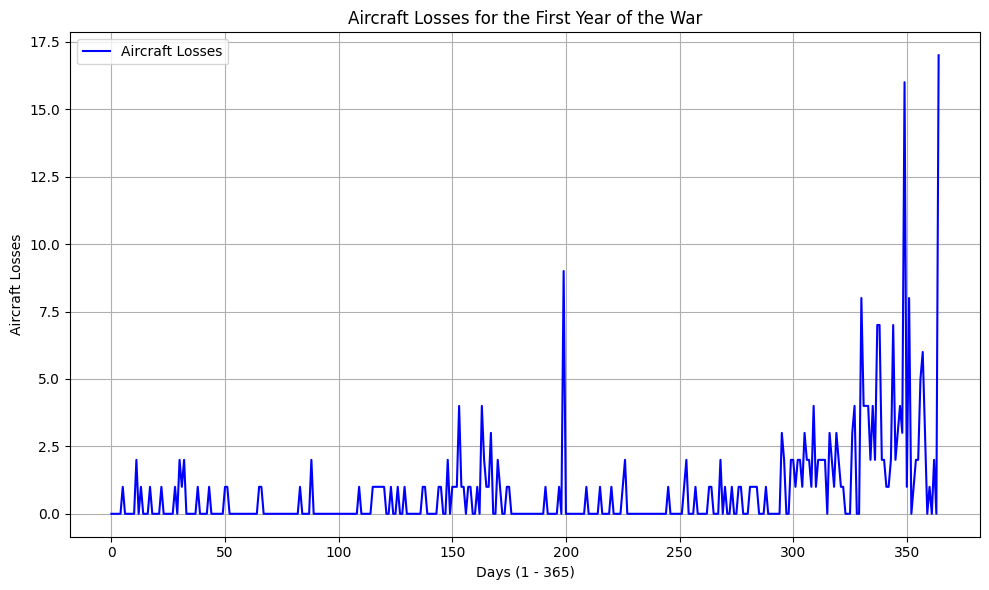

Графік збережено за адресою: C:\Windows\System32\Taran\aircraft_losses_first_year.png


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Функція для завантаження даних зі стовпця
def load_column_data(filename, column_name, is_date=False):
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        column_index = headers.index(column_name)
        if is_date:
            column_data = [row[column_index] for row in reader if row[column_index]]
        else:
            column_data = [int(row[column_index]) for row in reader if row[column_index]]
    return np.array(column_data)

# 2. Завантаження даних літаків та дат
filename = 'russia_losses_equipment.csv'
aircraft_data = load_column_data(filename, 'aircraft')  # Масив загальної кількості літаків
dates = load_column_data(filename, 'date', is_date=True)  # Масив дат

# Виведення масиву літаків
print("Aircraft Data:\n", aircraft_data)

# 3. Обчислення добових втрат літаків (тільки позитивні значення)
def daily_losses(data):
    losses = np.diff(data) * -1  # Отримуємо втрати
    losses[losses < 0] = 0  # Змінюємо всі від’ємні значення на 0
    return losses

daily_aircraft_losses = daily_losses(aircraft_data)  # Масив добових втрат літаків

# Виведення масиву добових втрат
print("Daily Aircraft Losses:\n", daily_aircraft_losses)

# 4. Знаходження 3 найбільших добових втрат літаків
def top_3_losses(daily_data):
    sorted_indices = np.argsort(daily_data)[-3:][::-1]
    return daily_data[sorted_indices]

top_3_daily_losses = top_3_losses(daily_aircraft_losses)
print("Top 3 Daily Aircraft Losses:", top_3_daily_losses)

# 5. Визначення кількості збитих літаків влітку 2022 року
def calculate_summer_losses(data, dates):
    # Перевіряємо, чи дати потрапляють у період літа 2022 року
    summer_mask = (np.array(dates[1:]) >= '2022-06-01') & (np.array(dates[1:]) <= '2022-08-31')
    return np.sum(data[summer_mask])

summer_losses = calculate_summer_losses(daily_aircraft_losses, dates)
print("Summer 2022 Aircraft Losses:", summer_losses)

# 6. Знаходження середнього значення втрат авіації за останні 300 днів війни
def average_losses(data, start_day, end_day):
    return np.mean(data[start_day:end_day])

average_loss_last_300 = average_losses(daily_aircraft_losses, -300, None)  # Останні 300 днів
print("Average Aircraft Losses in the Last 300 Days:", average_loss_last_300)

# 7. Створення графіка втрат літаків за перший рік війни
def plot_losses(data, start_date, end_date, dates, save_path):
    # Фільтруємо дані для першого року війни
    start_date = start_date.replace('-', '')  # Заміна дефісів для порівняння
    end_date = end_date.replace('-', '')  # Заміна дефісів для порівняння

    filtered_dates = []
    filtered_losses = []

    for i, date in enumerate(dates[1:]):
        formatted_date = date.replace('-', '')  # Заміна дефісів для порівняння
        if start_date <= formatted_date <= end_date:
            filtered_dates.append(date)  # Додаємо дату
            filtered_losses.append(data[i])  # Додаємо втрати

    # Створюємо графік
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(filtered_losses)), filtered_losses, linestyle='-', color='b', label='Aircraft Losses')
    plt.title("Aircraft Losses for the First Year of the War")
    plt.xlabel(f"Days (1 - {len(filtered_losses)})")  # Відображення дня
    plt.ylabel('Aircraft Losses')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.savefig(save_path)  # Збереження графіка
    plt.show()

# Шлях для збереження графіка
save_directory = r"C:\Windows\System32\Taran"
save_path = f"{save_directory}\\aircraft_losses_first_year.png"

# Створення графіку втрат літаків за перший рік війни
plot_losses(daily_aircraft_losses, '2022-02-24', '2023-02-24', dates, save_path)

print(f"Графік збережено за адресою: {save_path}")
